In [2]:
from rnncomp.dataman import *

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [6]:
def load_dat_file(fi):
    """stupid hack to let `make_run_args` accept a file
    or just a dat structure"""

    if type(fi) == np.lib.npyio.NpzFile:
        dat = fi["class_sig_list"]
    else:
        dat = fi

    cls_num = dat.shape[0]
    sig_num = dat.shape[1]
    dims = dat.shape[2]
    t_steps = dat.shape[3]

    return dat, cls_num, sig_num, dims, t_steps

In [12]:
def make_run_args_nengo(fi):
    """reshape before passing (stop organising by class) 
    and get the correct-ans and pass that too

    the Nengo args need to be defined for each time step and include pauses"""

    dat, cls_num, sig_num, dims, t_steps = load_dat_file(fi)

    pause_size = int(PAUSE/dt)

    # append zeros to the questions for pauses
    tot_sigs = int(cls_num*sig_num)
    zer = np.zeros((tot_sigs, dims, pause_size))
    re_zer = dat.reshape((tot_sigs, dims, t_steps))
    final_dat = np.concatenate((zer, re_zer), axis=2)
    return final_dat

In [44]:
t_dat, t_cor = mk_cls_dataset(t_len=0.1, dims=2, n_classes=3, freq=0, class_type="flat", save_res=False)[0]
print(t_dat.shape)

(3, 1, 2, 100)


In [45]:
res = make_run_args_nengo(t_dat)
print(res.shape)

(3, 2, 110)


(0, 1.1)

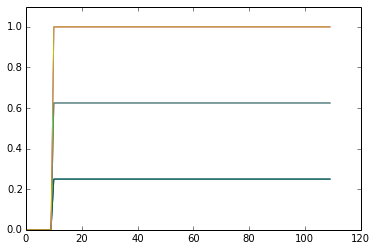

In [54]:
for ri in range(res.shape[0]):
    for dim in range(res.shape[1]):
        plt.plot(res[ri][dim])
plt.ylim(0, 1.1)

In [48]:
t1_dat = mk_cls_dataset(t_len=0.1, dims=1, n_classes=3, freq=0, class_type="flat", save_res=False)[0]

In [49]:
res1 = make_run_args_nengo(t1_dat)
print(res1.shape)

(3, 1, 110)


(0, 1.1)

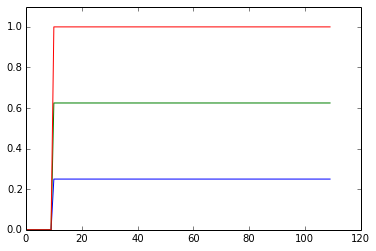

In [50]:
for ri in range(res1.shape[0]):
    plt.plot(res1[ri].squeeze())
plt.ylim(0, 1.1)